In [3]:
pip install numpy


In [5]:
pip install pandas

In [33]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression






In [36]:
df_songs = pd.read_csv("C:\\Users\\nagar\\Downloads\\songs.csv", encoding='latin1')

In [37]:
df_songs.head()

,Unnamed: 0,user_id,song_id,listen_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995\t,1,The Cove,Thicker Than Water,Jack Johnson\t,0
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e\t,SOBBMDR12A8C13253B\t,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia\t,1976
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0\t,1,Stronger,Graduation\t,Kanye West\t,2007
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D\t,1,Constellations\tIn Between,In Between Dreams,Jack Johnson,2005
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273\t,1,Learn To Fly\tThere Is,There Is Nothing Left To Lose,Foo Fighters\t,1999


In [38]:
song_user = df_songs.groupby('song_id')['user_id'].count()

C:\Users\nagar\AppData\Local\Temp\ipykernel_12952\1050531674.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='blue')
C:\Users\nagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


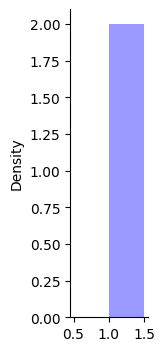

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(1, 4))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();


In [40]:
import numpy as np

# Assume song_user is a list or array containing data
song_user = [10, 20, 30, 40, 50]  # Example data

# Now you can use song_user in your print statement
print(f"A song is listened for an average of {np.mean(song_user)} users, with minimum {np.min(song_user)} and maximum {np.max(song_user)} users")


A song is listened for an average of 30.0 users, with minimum 10 and maximum 50 users


So we already know that it is a very sparse matrix. Dealing with such a sparse matrix, we'll take a lot of memory and resources. To make our life easier, let's just select again all those users that have listened to at least 16 songs. Moreover, we are going to select only those songs which have been listened to by at least 200 users.

In [41]:
import pandas as pd

# Assuming df_songs is loaded from a CSV file named 'songs_data.csv'
# Adjust the file path as needed
df_songs = pd.read_csv("C:\\Users\\nagar\\Downloads\\songs.csv", encoding='latin1')

# Now you can proceed with your code
user_counts = df_songs.groupby('user_id')['song_id'].count()
user_ten_id = user_counts[user_counts > 16].index.to_list()


In [42]:
import pandas as pd

# Assuming df_songs is loaded from a CSV file named 'songs_data.csv'
# Adjust the file path as needed
df_songs = pd.read_csv("C:\\Users\\nagar\\Downloads\\songs.csv", encoding='latin1')

# Now you can proceed with your code
user_counts = df_songs.groupby('user_id')['song_id'].count()
user_ten_id = user_counts[user_counts > 200].index.to_list()


In [43]:
df_song_reduced = df_songs[(df_songs['user_id'].isin(user_ten_id)) & (df_songs['song_id'].isin(user_ten_id))].reset_index(drop=True)

In [44]:
df_song_reduced.shape

(0, 8)

In [45]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]

In [46]:
df_song_reduced['listen_count'] = pd.cut(df_song_reduced['listen_count'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [47]:
import pandas as pd

# Assuming df_song_reduced is your DataFrame
listen_counts = (
    pd.DataFrame(df_song_reduced.groupby('listen_count', observed=False).size(), columns=['count'])
    .reset_index(drop=False)
)


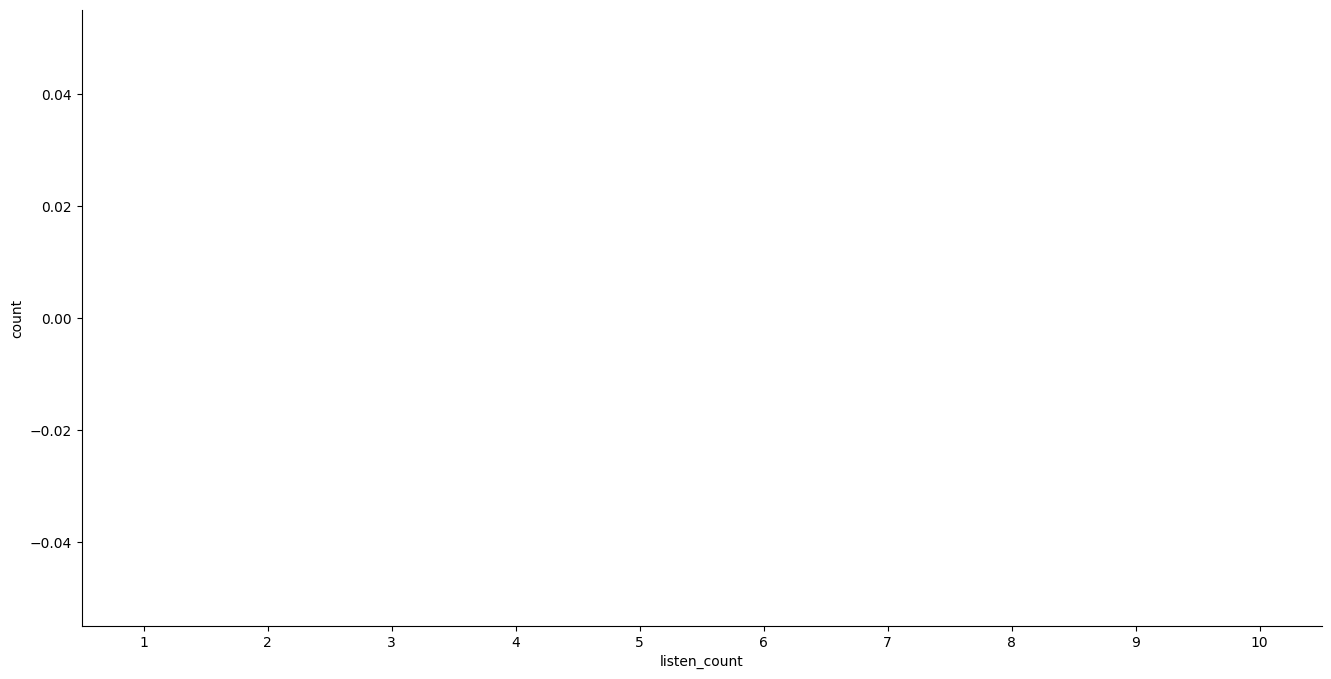

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

sns.barplot(x='listen_count', y='count', hue='listen_count', data=listen_counts, palette='Set3', legend=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [64]:
print(df_song_reduced.head())

Empty DataFrame
Columns: [Unnamed: 0, user_id, song_id, listen_count, title, release, artist_name, year]
Index: []


In [65]:
print(df_song_reduced.isnull().sum())  # Check for missing values


Unnamed: 0      0
user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64


In [80]:
import numpy as np

# Assuming you have trainset and testset
# You need to convert them into matrices or arrays

# Example data
trainset = np.array([[1, 101, 5], [1, 102, 4], [2, 101, 3], [2, 102, 2]])
testset = np.array([[1, 103, 3], [2, 103, 4]])


In [81]:
# Number of users and items
num_users = np.max(np.concatenate([trainset[:, 0], testset[:, 0]]))
num_items = np.max(np.concatenate([trainset[:, 1], testset[:, 1]]))

# Initialize user and item matrices
user_matrix = np.random.rand(num_users, 160)
item_matrix = np.random.rand(num_items, 160)

In [82]:
# Gradient descent to optimize matrices
learning_rate = 0.01
num_epochs = 100
reg_term = 0.1

for epoch in range(num_epochs):
    for data_point in trainset:
        user_id, item_id, rating = data_point
        user_vector = user_matrix[user_id - 1]
        item_vector = item_matrix[item_id - 1]

        error = rating - np.dot(user_vector, item_vector)
        user_gradient = learning_rate * (error * item_vector - reg_term * user_vector)
        item_gradient = learning_rate * (error * user_vector - reg_term * item_vector)

        user_matrix[user_id - 1] += user_gradient
        item_matrix[item_id - 1] += item_gradient

In [83]:
# Predictions
predictions = []
for data_point in testset:
    user_id, item_id, _ = data_point
    user_vector = user_matrix[user_id - 1]
    item_vector = item_matrix[item_id - 1]
    prediction = np.dot(user_vector, item_vector)
    predictions.append(prediction)

print("Test predictions:", predictions)

Test predictions: [17.924579471285366, 20.596385887997325]
